In [35]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

In [38]:
import pandas as pd
df = pd.read_csv('Dongdaemun Design Plaza.csv')
df = df.loc[:,['STAR','CONTENT']]
df['SCORE'] = (df['STAR']>3)
df=df.replace(True,"Positive")
df=df.replace(False,"Negative")
df

,STAR,CONTENT,SCORE
0,4.0,a summer resort in the city,Positive
1,5.0,2 expositions absolument divine en 2 heures Do...,Positive
2,5.0,Exhibition Name Tim Burton Special Exhibition...,Positive
3,5.0,Tim Burton exhibit was incredible Awesome place,Positive
4,5.0,You can see everything about Tim Burton Great...,Positive
...,...,...,...
1118,4.0,"State-of-the-art design, surely one of its kin...",Positive
1119,5.0,"Loved the lit LED roses, thousands of them. An...",Positive
1120,5.0,It is a modern and amazed architesture and it ...,Positive
1121,4.0,Its unique design is an attraction. It's nice ...,Positive


In [39]:
vd=[]
for a in df['CONTENT']:
    vd.append(sia.polarity_scores(a)['compound'])
df['COMPOUND']=vd
df

,STAR,CONTENT,SCORE,COMPOUND
0,4.0,a summer resort in the city,Positive,0.0000
1,5.0,2 expositions absolument divine en 2 heures Do...,Positive,0.5574
2,5.0,Exhibition Name Tim Burton Special Exhibition...,Positive,0.4019
3,5.0,Tim Burton exhibit was incredible Awesome place,Positive,0.6249
4,5.0,You can see everything about Tim Burton Great...,Positive,0.8316
...,...,...,...,...
1118,4.0,"State-of-the-art design, surely one of its kin...",Positive,0.9448
1119,5.0,"Loved the lit LED roses, thousands of them. An...",Positive,0.5994
1120,5.0,It is a modern and amazed architesture and it ...,Positive,0.8934
1121,4.0,Its unique design is an attraction. It's nice ...,Positive,0.8176


In [40]:
senti = []
for a in df.COMPOUND.astype(float):
    if a >= 0.05:
        senti.append("Positive")
    elif a<= -0.05:
        senti.append("Negative")
    else: 
        senti.append("Neutral")

df["VADER"] = senti
df

,STAR,CONTENT,SCORE,COMPOUND,VADER
0,4.0,a summer resort in the city,Positive,0.0000,Neutral
1,5.0,2 expositions absolument divine en 2 heures Do...,Positive,0.5574,Positive
2,5.0,Exhibition Name Tim Burton Special Exhibition...,Positive,0.4019,Positive
3,5.0,Tim Burton exhibit was incredible Awesome place,Positive,0.6249,Positive
4,5.0,You can see everything about Tim Burton Great...,Positive,0.8316,Positive
...,...,...,...,...,...
1118,4.0,"State-of-the-art design, surely one of its kin...",Positive,0.9448,Positive
1119,5.0,"Loved the lit LED roses, thousands of them. An...",Positive,0.5994,Positive
1120,5.0,It is a modern and amazed architesture and it ...,Positive,0.8934,Positive
1121,4.0,Its unique design is an attraction. It's nice ...,Positive,0.8176,Positive


In [41]:
df.to_csv("Dongdaemun Design Plaza_LSTM.csv")

In [42]:
vd = df.loc[:,['CONTENT','VADER']]
vd

,CONTENT,VADER
0,a summer resort in the city,Neutral
1,2 expositions absolument divine en 2 heures Do...,Positive
2,Exhibition Name Tim Burton Special Exhibition...,Positive
3,Tim Burton exhibit was incredible Awesome place,Positive
4,You can see everything about Tim Burton Great...,Positive
...,...,...
1118,"State-of-the-art design, surely one of its kin...",Positive
1119,"Loved the lit LED roses, thousands of them. An...",Positive
1120,It is a modern and amazed architesture and it ...,Positive
1121,Its unique design is an attraction. It's nice ...,Positive


In [43]:
vd['CONTENT'].value_counts()

Interesting art pieces around the plaza. Inside is a museum with special exhibits at times. Right outside is the Seoul City Tour double decker bus which you can buy a ticket for to enjoy sites around the area.                       4
Beautiful structure. I was so amazed how it was done. You have to see it for yourself. One of the best place I have visited in South Korea. Superb 😊                                                                                    2
Very nice to go even on a rainyday. Seoul showing off their modern arquitecture you can take nice pictures and visit Kako friends shop without the crowd.                                                                               2
Glad to be a witness of Zaha Hadid’s work in Seoul, all the curves and the details that house all the creative spaces in the complex such as museums, galleries, multi-purpose halls, markets and restaurants, such eye candies.        2
Visited this place after recommended from local. The design of t

In [44]:
# 중복 데이터 제거
vd['CONTENT'].nunique(), vd['VADER'].nunique()

(772, 3)

In [45]:
vd.drop_duplicates(subset=['CONTENT'], inplace =True)
print("총 샘플의 수:", len(vd))

총 샘플의 수: 772


<AxesSubplot:>

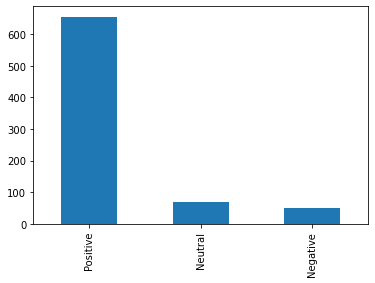

In [46]:
# 긍부정 분포 
vd['VADER'].value_counts().plot(kind='bar')

In [47]:
# Null 값 존재 여부 확인
print(vd.isnull().values.any())

# NULL 값이 존재한다면, 
# vd.data.loc[vd.CONTENT.isnull()]

False


In [48]:
vd.to_csv("Dongdaemun Design Plaza_VADER.csv")